In [2]:
# Problem 1
# Predicting network attacks

# https://www.kaggle.com/datasets/asfandyar250/network general network from ISP can be used later to check perhaps
# https://www.kaggle.com/datasets/hawkcurry/2019-trendmicro-ctf-wildcard-400 regarding general network security


# https://www.nature.com/articles/s41598-021-91805-z
# https://www.kaggle.com/datasets/anushonkar/network-anamoly-detection
# https://blog.dataiku.com/tree-based-models-how-they-work-in-plain-english

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../datasets/network/Train.txt", names=column_names)
dataset.head()

#notes
# - are each packet correlated to each other or are they independent
# - tree based method to predict whether its malicious then use classification for which type
# - Linear discriminant analysis
# - quadratic discriminant analysis
# - K-nearest neighbors



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
# Dataset size
dataset.shape

(125973, 43)

In [4]:
# Dataset columns
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

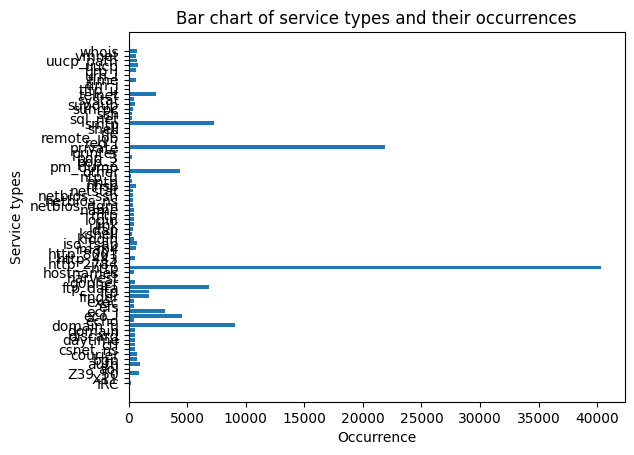

Occurrence and  their occurrences
IRC - 187
X11 - 73
Z39_50 - 862
aol - 2
auth - 955
bgp - 710
courier - 734
csnet_ns - 545
ctf - 563
daytime - 521
discard - 538
domain - 569
domain_u - 9043
echo - 434
eco_i - 4586
ecr_i - 3077
efs - 485
exec - 474
finger - 1767
ftp - 1754
ftp_data - 6860
gopher - 518
harvest - 2
hostnames - 460
http - 40338
http_2784 - 1
http_443 - 530
http_8001 - 2
imap4 - 647
iso_tsap - 687
klogin - 433
kshell - 299
ldap - 410
link - 475
login - 429
mtp - 439
name - 451
netbios_dgm - 405
netbios_ns - 347
netbios_ssn - 362
netstat - 360
nnsp - 630
nntp - 296
ntp_u - 168
other - 4359
pm_dump - 5
pop_2 - 78
pop_3 - 264
printer - 69
private - 21853
red_i - 8
remote_job - 78
rje - 86
shell - 65
smtp - 7313
sql_net - 245
ssh - 311
sunrpc - 381
supdup - 544
systat - 477
telnet - 2353
tftp_u - 3
tim_i - 8
time - 654
urh_i - 10
urp_i - 602
uucp - 780
uucp_path - 689
vmnet - 617
whois - 693


In [31]:
def occurence_plots(column, xlabel, ylabel, title):
    labels, values = np.unique(dataset[column], return_counts=True)
    plt.barh(labels, values, align="center")
    # plt.yticks([1]*len(labels), labels=labels)
    # print([0.5]*2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

    print(f"{xlabel} and  their occurrences")
    for i in range(0, len(labels)):
        print(labels[i], "-",  values[i])

# occurence_plots("duration", "Occurrence", "Traffic durations", "Bar chart of traffic durations and their occurrences")
# occurence_plots("protocol_type", "Occurrence", "Protocol types", "Bar chart of protocol types and their occurrences")
occurence_plots("service", "Occurrence", "Service types", "Bar chart of service types and their occurrences")
# occurence_plots("flag", "Occurrence", "Flag types", "Bar chart of flag types and their occurrences")
# occurence_plots("attack", "Occurrence", "Attack class", "Bar chart of attack classes and their occurrences")

Normal and Malicious traffic distribution

In [ ]:
#
normal_traffic = dataset[dataset['attack'] == "normal"]
malicious_traffic = dataset[dataset['attack'] != "normal"]



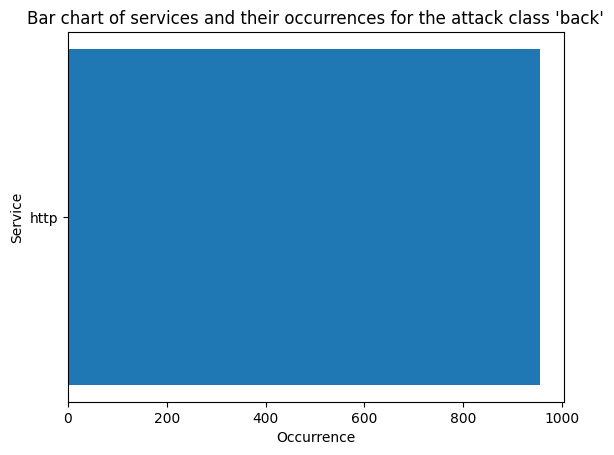

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

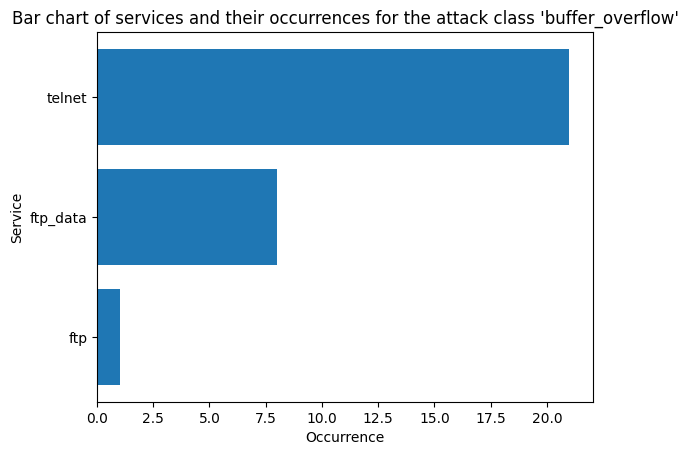

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

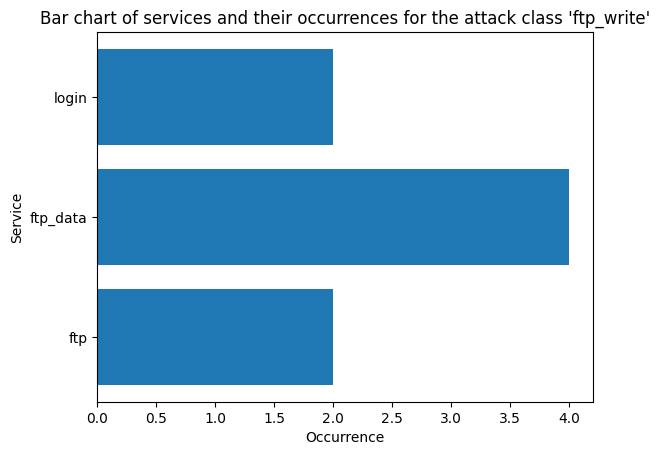

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

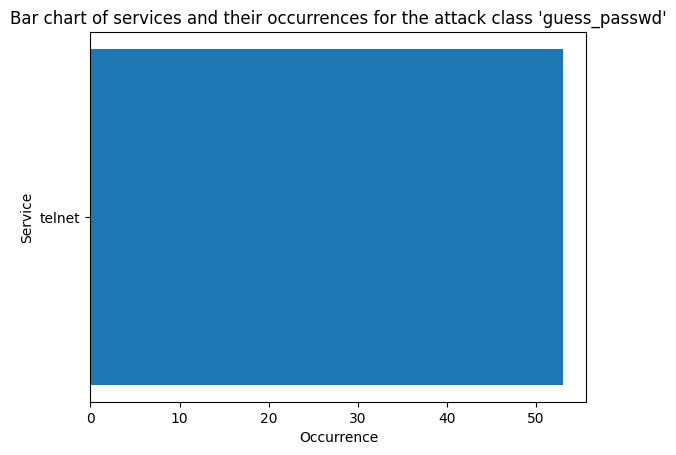

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

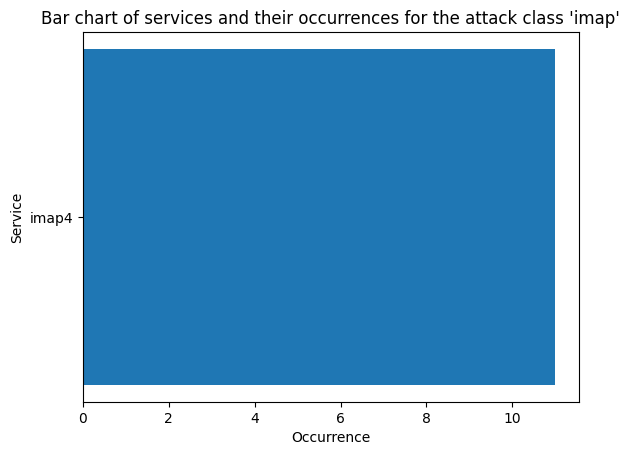

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

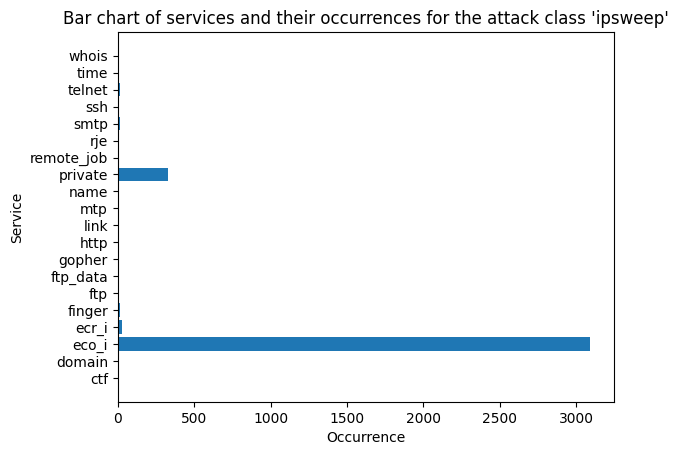

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

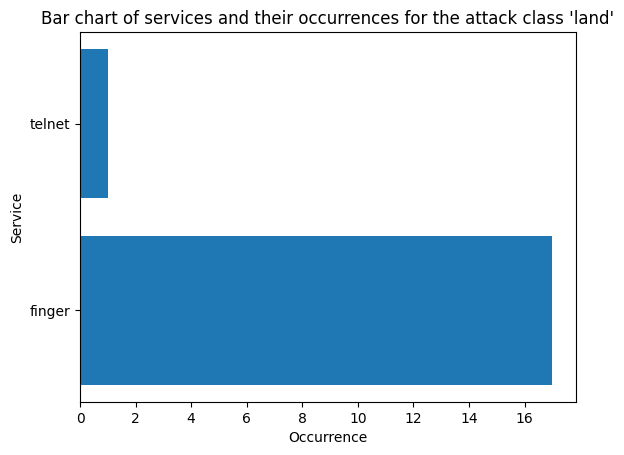

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

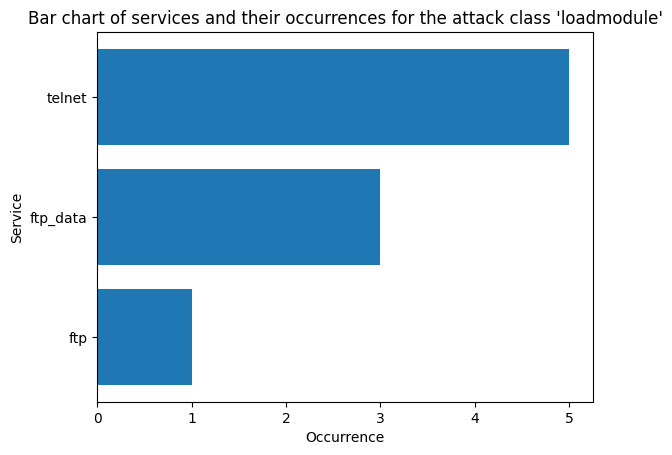

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

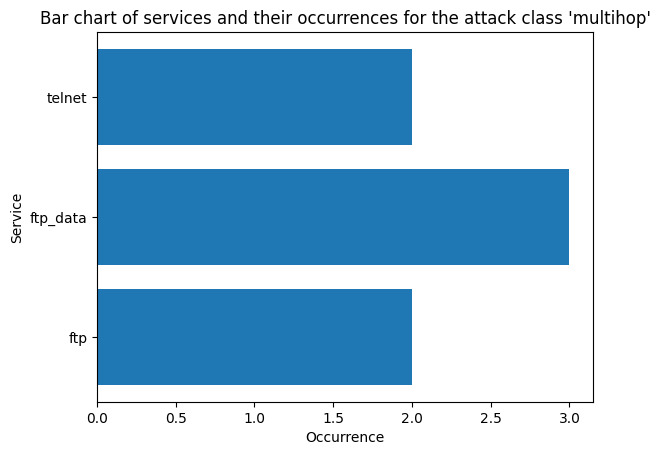

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

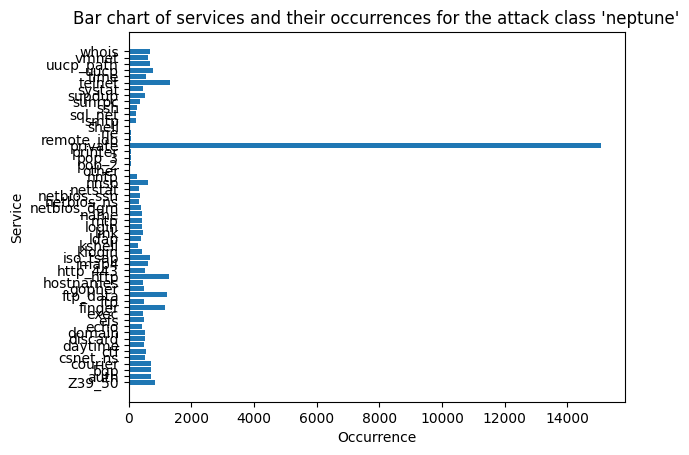

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

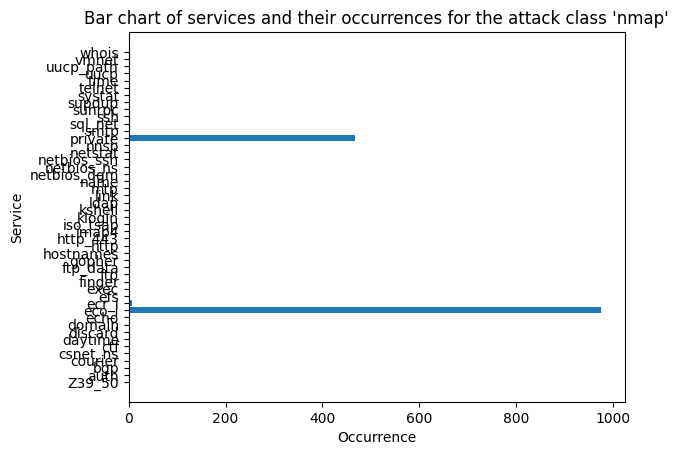

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

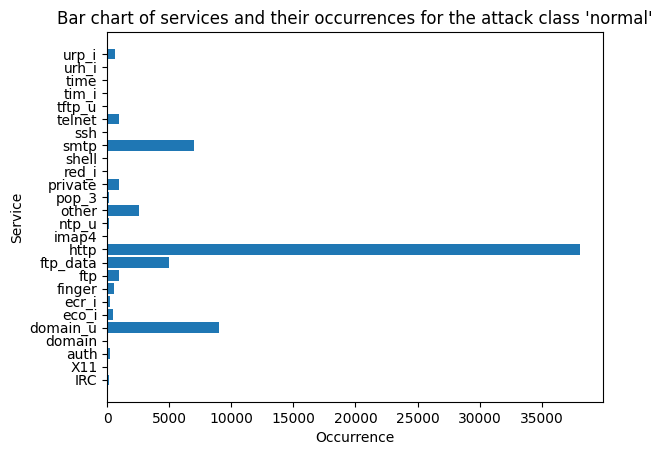

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

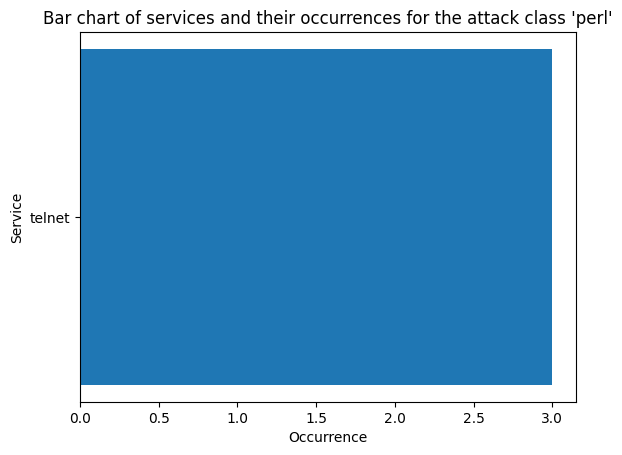

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

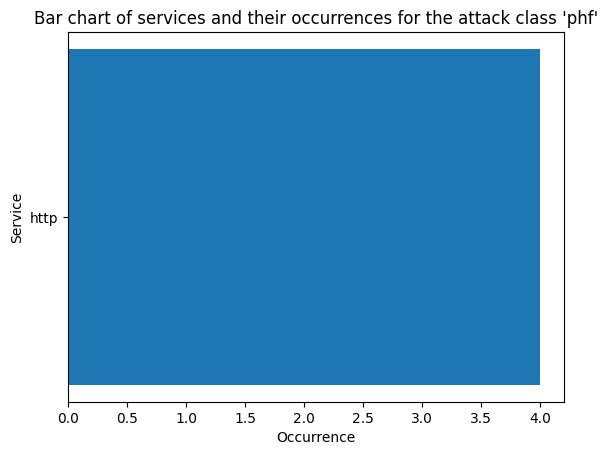

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

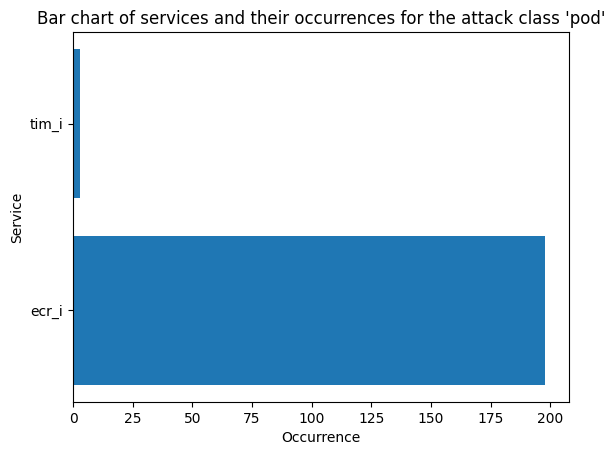

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

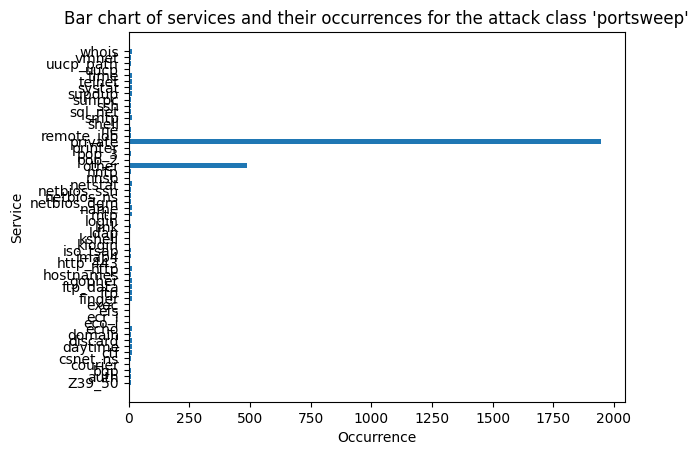

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

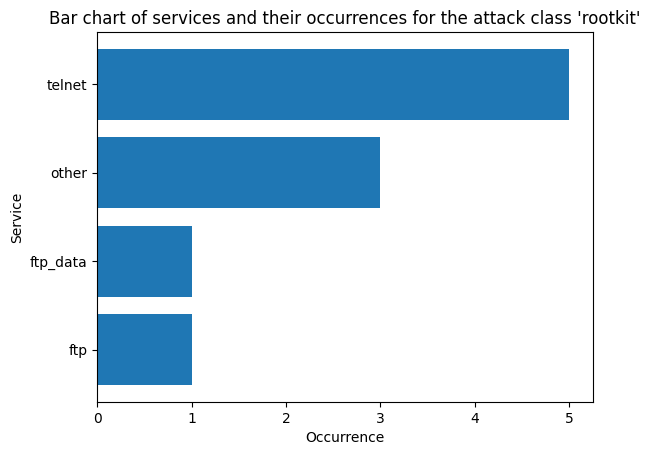

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

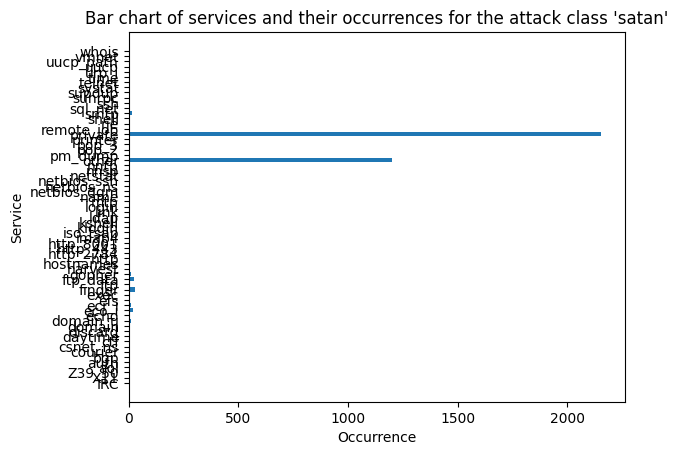

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

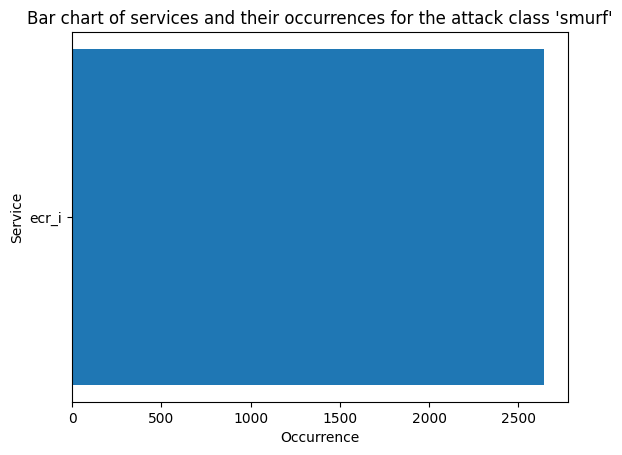

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

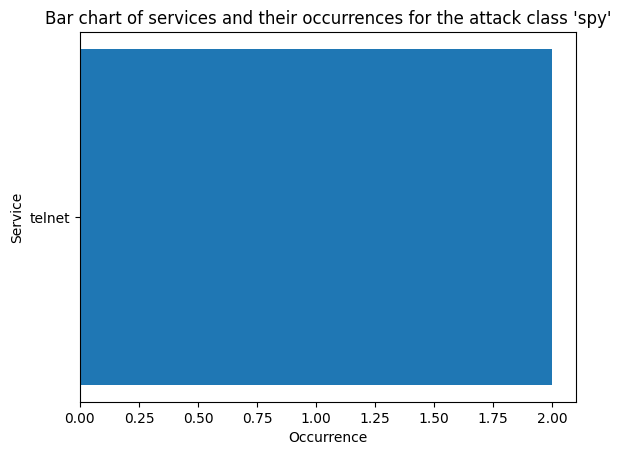

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

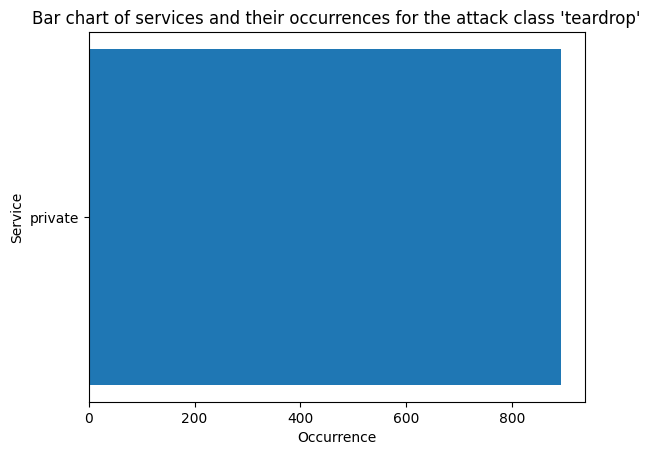

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

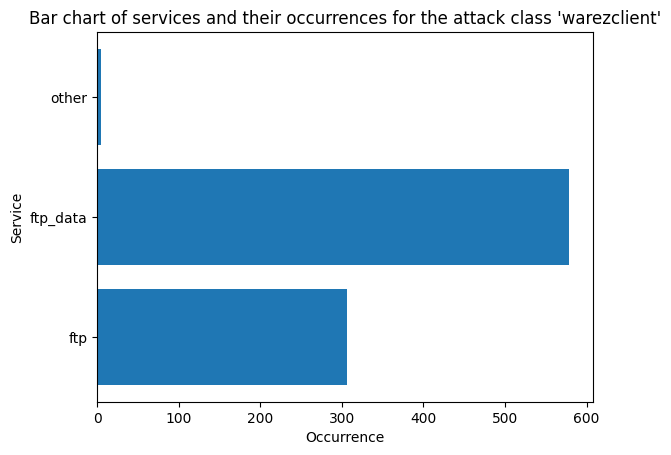

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

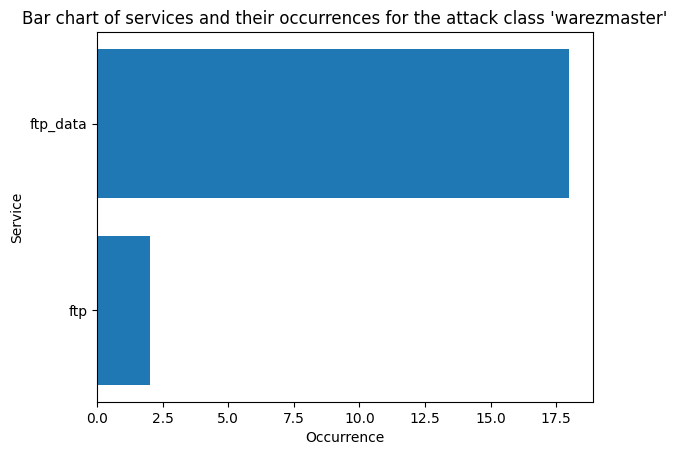

<Figure size 1000x480 with 0 Axes>

<Figure size 640x1000 with 0 Axes>

In [ ]:
for label in labels:
    l, v = np.unique(dataset[dataset['attack'] == label]['service'], return_counts=True)
    plt.barh(l, v, align="center")
    plt.ylabel("Service")
    plt.xlabel("Occurrence")
    plt.title(f"Bar chart of services and their occurrences for the attack class '{label}'")
    # plt.figure().set_figwidth(10)
    # plt.figure().set_figheight(10)
    plt.show()

In [ ]:
# Problem 2
# detecting a malicious actor from the logs.
# https://www.kaggle.com/datasets/omduggineni/loghub-windows-log-data

In [ ]:
#https://www.kaggle.com/datasets/luccagodoy/obfuscated-malware-memory-2022-cic
#https://www.kaggle.com/datasets/ehoseinz/cnnpred-stock-market-prediction
#https://www.kaggle.com/datasets/sandunabeysooriya/phishing-detection-dataset

#https://www.nature.com/articles/s41597-023-02192-1
#https://www.nature.com/articles/s41597-021-00982-z
#https://www.nature.com/articles/s41597-022-01143-6

# https://www.kaggle.com/datasets/jaredsavage/solar-system-major-bodies-data
# https://www.kaggle.com/datasets/iamsouravbanerjee/planet-dataset

